# RepMet usecase: Automatic recognition of retail scenario 

## Introduction

Intelligent retail technology enabled by AI now provide more faster weighing, scanning code and checkout process. Automatic identification of goods at checkout will save people's time and make shopping more convenient. Robots can also sort shelves, goods and move the cargo space, replacing humans to do some simple and repetitive work. The production efficiency will be greatly improved.

IBM Research is exploring a solution to quickly identify new SKUs with few shot learning. For instance, since the retail objects are getting constantly renewed, we want the store staff to make just a little effort of introducing the new items into the system. The technology it is based on is the RepMet few-shot detection engine. To acquire a stable SKU detector, there are two steps. The first step is to train a retail basemodel which is robust enough for all SKUs. The seconde step is to train a fewshot model to detect new SKU through few-shot detection engine.

## 1. Basemodel training

1.1 Generate basemodel training dataset. Now the training dataset is selected manually. We found that more categories leads to better performance on few-shot detection task. 

In [1]:
%run -i 'notebook_startup.py'
from retail_case import oid2coco
oid2coco()

/usr/lib/python2.7/dist-packages/scipy/stats/morestats.py:16: DeprecationWarning: Importing from numpy.testing.decorators is deprecated since numpy 1.15.0, import from numpy.testing instead.
  from numpy.testing.decorators import setastest


The example of roidb is :
{'gt_classes': array([314, 531, 145, 145, 362], dtype=int32), 'max_classes': array([314, 531, 145, 145, 362], dtype=int32), 'image': u'/opt/DNN/linkdata/retail/93de8156cfcec797.jpg', 'flipped': False, 'width': 1024, 'boxes': array([[721, 179, 887, 302],
       [247, 357, 812, 765],
       [188, 120, 378, 307],
       [464, 207, 612, 333],
       [252, 393, 818, 758]], dtype=uint16), 'max_overlaps': '', 'height': 765, 'gt_overlaps': '' ...}

1.2 Basemodel training.

python /opt/DNN/fpn/train_end2end.py --cfg=/opt/DNN/experiments/m_configs/mcfg_openimage_retail.yaml

The training process example in log:
args.cfg: dataset/new_open_image/test1/mcfg_openimage_retail_02test.yaml 
('Called with argument:', Namespace(cfg='dataset/new_open_image/test1/mcfg_openimage_retail_02test.yaml', debug=0, frequent=10))
....
Epoch[19] Batch [8550]	Speed: 2.88 samples/sec	Train-RPNAcc=0.996940,	RPNLogLoss=0.008987,	RPNL1Loss=0.023399,	Proposal FG Fraction=0.156256,	R-CNN FG Accuracy=0.507933,	RCNNAcc=0.908264,	RCNNLogLoss=0.392023,	RCNNL1Loss=0.084249,	RepresentativesStats=0.000000,	EmbedLoss=0.387883,	RCNNLinLogLoss=0.248317,	

## 2.Few-shot learning

## Example of new retail classes:

nrows=1,ncols=4.0


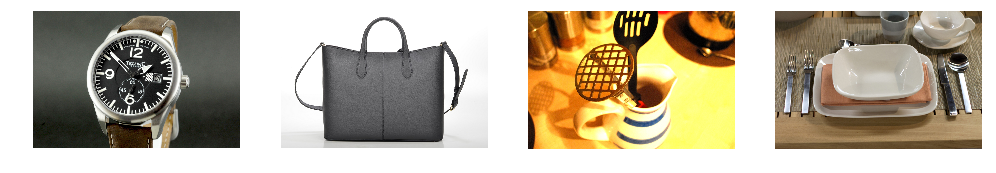

In [2]:
from retail_case import display_few_shot_examples
display_few_shot_examples()

## Benchmark of new classes:

In [2]:
args.bcfg_fname = '../experiments/bench_configs/openimage_3_5_10_1.yaml'
args.bcfg_args = 'NA'
args.gpu = 0 # the GPU ordinal on multti-GPU machine
benchmark = FSD_bench(args) # create the FSD benchmark object 
benchmark.setup()
benchmark.gen_episodes()
benchmark.run_episodes()

../fpn/config/bench_config.py:77: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  exp_config = edict(yaml.load(f))
2019-10-17 01:58:12,053 - my_logger - INFO -  ========= starting FSD benchmark openimage_3_5_10_1
2019-10-17 01:58:12,360 - my_logger - INFO - Loading existing episodes data.
2019-10-17 01:58:12,366 - my_logger - INFO - Starting episode 0 -------
2019-10-17 01:58:13,375 - my_logger - INFO - - running train_model with novel_train_type=0
2019-10-17 01:58:18,873 - my_logger - INFO - No rois found for training box of Volleyball


Box #0 - no overlapping detection boxes found
Box #0 - no overlapping detection boxes found


2019-10-17 01:58:31,560 - my_logger - INFO - No rois found for training box of Sunglasses


Box #0 - no overlapping detection boxes found


2019-10-17 01:58:37,165 - my_logger - INFO - Introducing novel classes to the model
2019-10-17 01:58:37,208 - my_logger - INFO - Generating reps. Class Pasta: 3 good samples, 0 bad samples
2019-10-17 01:58:37,210 - my_logger - INFO - Generating reps. Class Sunglasses: 2 good samples, 1 bad samples
2019-10-17 01:58:37,212 - my_logger - INFO - Generating reps. Class Hamburger: 3 good samples, 0 bad samples
2019-10-17 01:58:37,213 - my_logger - INFO - Generating reps. Class Volleyball: 2 good samples, 1 bad samples
2019-10-17 01:58:37,215 - my_logger - INFO - Generating reps. Class Clock: 3 good samples, 0 bad samples
2019-10-17 01:58:37,235 - my_logger - INFO - No fine-tuning was required.
2019-10-17 01:58:37,240 - my_logger - INFO - Producing detections on query images..
2019-10-17 01:59:55,521 - my_logger - INFO - stats_per_class: nGT: 58 TP: 58 FP(tot=wrong+bkgnd): 48467=203+48264 Recall: 1.000 mAP: 0.874
2019-10-17 01:59:55,830 - my_logger - INFO - stats_global:  #Dets: 48525, #GT: 5

0.873876688724606

## test on a query image

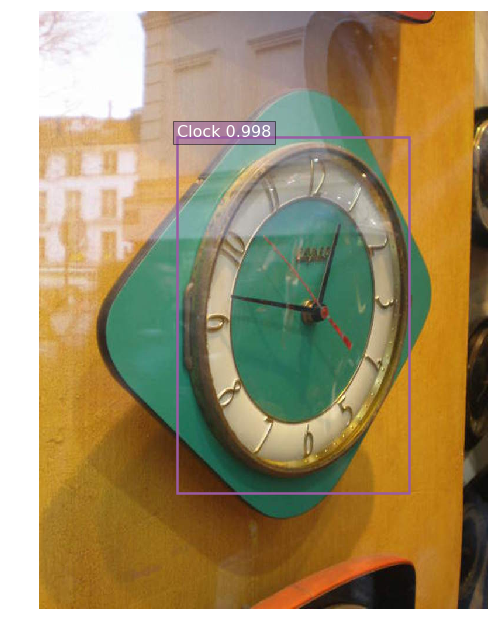

In [14]:
from retail_case import display_few_shot_test
query_image='/opt/DNN/linkdata/eval_dataset/open_images/images/train/5d14a0fc9d0ac143.jpg'
display_few_shot_test(benchmark,query_image)